In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
# step 1 importing data
data = pd.read_csv('"C:\\Users\\omare\Downloads\\Ir\\Emotion_final.csv"')
data.head()


In [1]:
 ratings = np.array([[94, 89, 63, 45], [93, 92, 48, 23], [92, 94, 56, 98]])


NameError: name 'np' is not defined

In [2]:
import numpy as np


In [3]:
 ratings = np.array([[94, 89, 63, 45], [93, 92, 48, 23], [92, 94, 56, 98]])


In [4]:
ratings.shape


(3, 4)

In [5]:
import pandas as pd


In [6]:
load_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv', index_col='Name')

C:\Users\omare\AppData\Local\Temp\ipykernel_11904\1987401145.py:1: DtypeWarning: Columns (14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  load_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv', index_col='Name')


In [7]:
agri_data = {
    'Crop': ['Wheat', 'Corn', 'Rice', 'Soybean'],
    'Yield_per_Acre': [3, 4.5, 5, 2.8],
    'Country': ['USA', 'China', 'India', 'Brazil']
}

In [8]:
agri_df = pd.DataFrame(agri_data)


In [9]:
agri_df.iloc[1:3]


,Crop,Yield_per_Acre,Country
1,Corn,4.5,China
2,Rice,5.0,India


In [10]:
agri_df.iloc[2:4]


,Crop,Yield_per_Acre,Country
2,Rice,5.0,India
3,Soybean,2.8,Brazil


In [11]:
import re

text = "Conservation efforts are increasing. Habitats are being restored. Species are recovering."
sentences = re.split(r"\. ", text)

print(sentences)


['Conservation efforts are increasing', 'Habitats are being restored', 'Species are recovering.']


In [12]:
import re

text = "The national park covers 5000 acres, while the community forest spans 750 acres."


In [13]:
pattern = re.compile(r'\d+\s*acres', re.IGNORECASE)


In [14]:
land_areas = pattern.findall(text)
print(land_areas)


['5000 acres', '750 acres']


In [15]:
pattern = re.compile(r'\b[A-Z][a-z]* [a-z]+\b')
text = "In the Amazon rainforest, species like Panthera onca, Inia geoffrensis, and Euterpe precatoria are found."

species = pattern.findall(text)
print(species)

['In the', 'Amazon rainforest', 'Panthera onca', 'Inia geoffrensis', 'Euterpe precatoria']


In [16]:
text = "The forest had a variety of trees including oak, maple, and pine. Other species included birch and spruce."

# Compiling the regex pattern
pattern = re.compile(r'\boak\b|\bmaple\b|\bpine\b', re.IGNORECASE)

# Finding all occurrences of the specified plants
found_plants = pattern.findall(text)

print(found_plants)

['oak', 'maple', 'pine']


In [17]:
social_media_posts = """
Great news! The GreenWood Project has successfully planted 10000 trees in the Amazon Rainforest #GreenEarth #Conservation
Update: ForestCoverApp shows a 12% increase in forest cover in the last 5 years. #TechForGood
Sad to see illegal logging in Madagascan rainforests. We need stricter laws! #SaveForests #ActNow
Celebrating World Environment Day with a pledge to plant 20000 trees. Join us! #EnvironmentDay #GoGreen
Interesting study published in NatureJournal: Rainforest biodiversity is crucial for ecological balance. #ScienceForNature
"""

In [18]:

def extract_hashtags(text):
    pattern = r'#\w+'
    hashtags = re.findall(pattern, text)
    return set(hashtags)  # Using a set to get unique hashtags

# Test with the provided text
print(extract_hashtags(social_media_posts))

{'#ScienceForNature', '#SaveForests', '#GreenEarth', '#EnvironmentDay', '#Conservation', '#GoGreen', '#TechForGood', '#ActNow'}


In [19]:
def extract_numbers(text):
    pattern = r'\b\d+\b'
    return re.findall(pattern, text)

# Test with the provided text
print(extract_numbers(social_media_posts))

['10000', '12', '5', '20000']


In [20]:
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")


In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
title_day = df.groupby('day')[['total_bill','tip','size']].sum() 

In [24]:
print(title_day)


      total_bill     tip  size
day                           
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216
Thur     1096.33  171.83   152


In [25]:
week_day = title_day.total_bill.sort_values().index

In [26]:
bill = title_day.total_bill.sort_values()

In [27]:
print(bill)


day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64


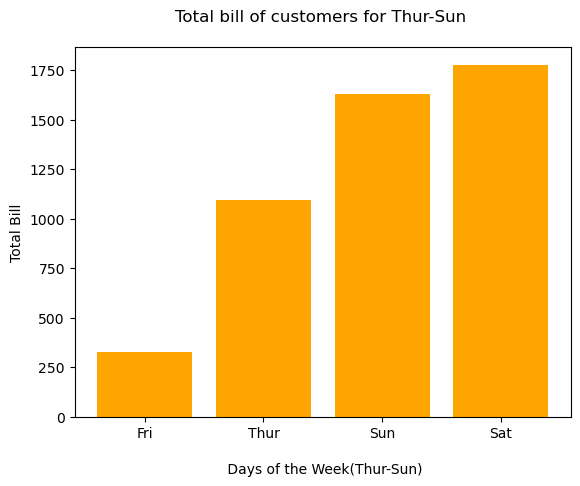

In [30]:
plt.bar(week_day, bill, color= 'orange')
plt.ylabel('Total Bill')
plt.xlabel('\n Days of the Week(Thur-Sun)')
plt.title('Total bill of customers for Thur-Sun \n')
plt.show()


In [32]:
title_time = df.groupby('time')[['total_bill','tip','size']].sum() 
print(title_time)


        total_bill     tip  size
time                            
Dinner     3660.30  546.07   463
Lunch      1167.47  185.51   164


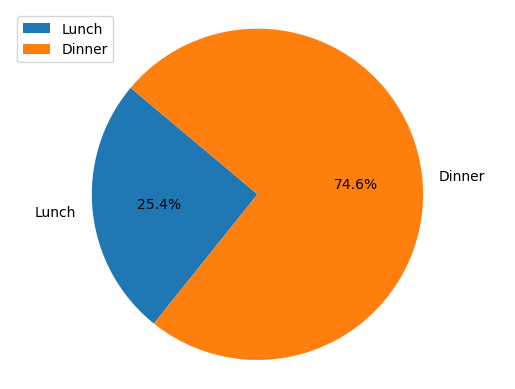

In [33]:
meal_time = title_time.tip.sort_values().index
tips = title_time.tip.sort_values()
plt.pie(tips, labels = meal_time, autopct='%1.1f%%',  startangle=140)
plt.legend(loc="best")
plt.axis('equal')
plt.show()


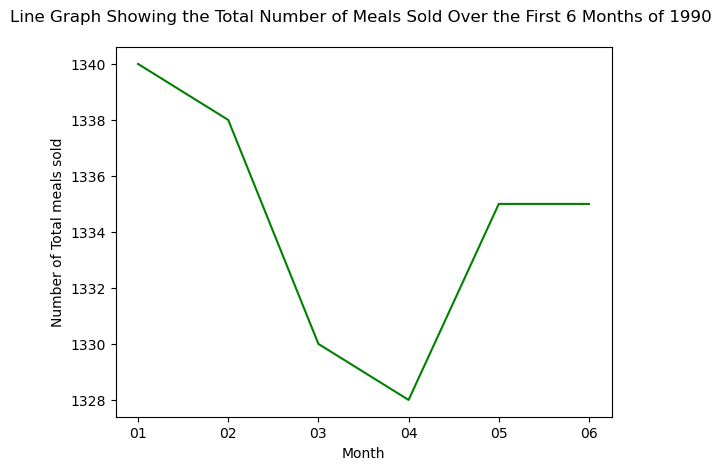

In [34]:
total_meals = {'31/01/1990': 1340, '28/02/1990': 1338, '31/03/1990': 1330, '30/04/1990': 1328, '31/05/1990': 1335, '30/06/1990': 1335}
dates = list(total_meals.keys())
x_ax = [date[3:5] for date in dates]
y_ax = list(total_meals.values())
plt.plot(x_ax, y_ax, color='green')
plt.xlabel('Month')
plt.ylabel('Number of Total meals sold')
plt.title('Line Graph Showing the Total Number of Meals Sold Over the First 6 Months of 1990 \n')
plt.show()


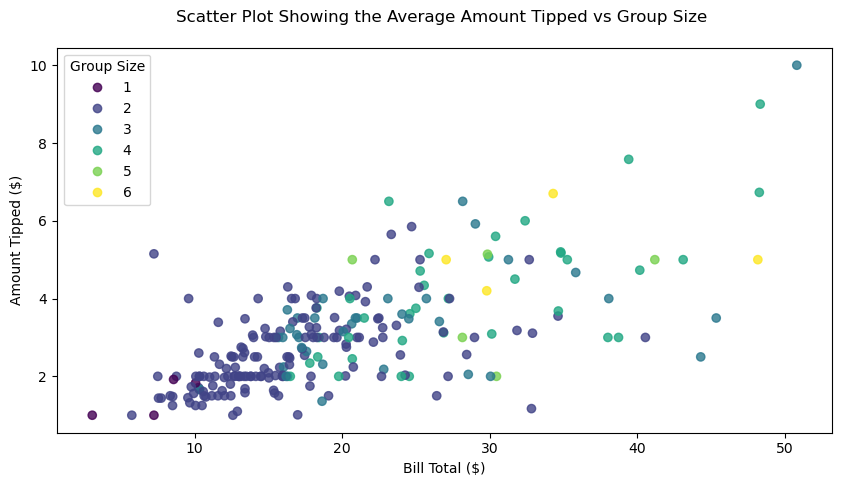

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
scatter = ax.scatter(df['total_bill'], df['tip'], c=df['size'], alpha=0.8)
ax.legend(*scatter.legend_elements(), loc="best", title="Group Size")
plt.title('Scatter Plot Showing the Average Amount Tipped vs Group Size \n')
plt.xlabel('Bill Total ($)')
plt.ylabel('Amount Tipped ($)')
plt.show()


In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
title_smoker = df.groupby('smoker')[['total_bill','tip','size']].sum()
print(title_smoker)


        total_bill     tip  size
smoker                          
No         2897.43  451.77   403
Yes        1930.34  279.81   224


In [41]:
smoker_status = title_smoker.total_bill.sort_values().index
bill = title_smoker.total_bill.sort_values() 
print(bill)


smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64


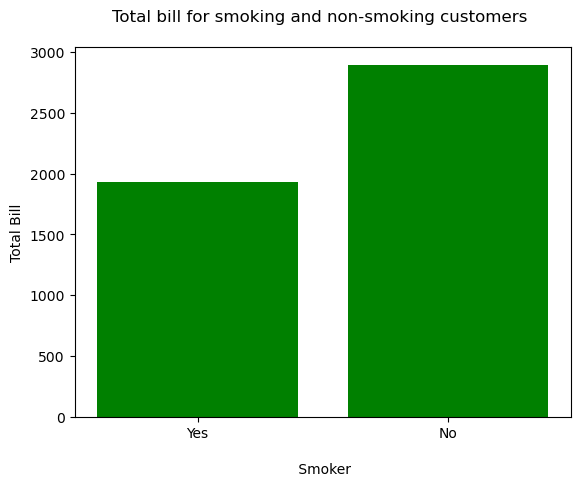

In [42]:
plt.bar(smoker_status, bill, color= 'green')
plt.ylabel('Total Bill')
plt.xlabel('\n Smoker')
plt.title('Total bill for smoking and non-smoking customers \n')
plt.show()


In [43]:
import seaborn as sns
soccer = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)


In [44]:
cols = ['Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

soccer[cols] = soccer[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [45]:
soccer.head(10)


,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK
5,R. Lewandowski,28,Poland,91.0,79.0,80.0,78.0,80.0,89.0,87.0,...,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST
6,De Gea,26,Spain,90.0,57.0,38.0,60.0,43.0,42.0,64.0,...,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,GK
7,E. Hazard,26,Belgium,90.0,93.0,54.0,93.0,91.0,92.0,87.0,...,86.0,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0,LW
8,T. Kroos,27,Germany,90.0,60.0,60.0,71.0,69.0,89.0,85.0,...,90.0,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0,CDM CM
9,G. Higuaín,29,Argentina,90.0,78.0,50.0,75.0,69.0,85.0,86.0,...,75.0,88.0,18.0,80.0,72.0,22.0,85.0,70.0,88.0,ST


In [46]:
soccer.describe()


,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17926.000000,17928.00000,17937.000000,17941.000000,17888.000000,17923.000000,17915.000000,17920.000000,...,17914.000000,17876.000000,17929.000000,17918.000000,17906.000000,17915.000000,17901.000000,17913.000000,17904.000000,17950.000000
mean,25.144541,66.247984,103.446893,77.59923,98.150248,86.616911,121.420338,103.764995,86.550600,62.586496,...,121.637937,115.298557,83.046796,89.598672,119.034849,123.126151,109.390425,116.040138,91.195878,54.622507
std,4.614272,6.987965,986.386054,768.79730,910.809847,752.123941,1236.108966,1028.086556,912.376407,623.794730,...,1161.367097,1157.803920,811.145271,1074.217147,1185.940156,1261.551333,1286.912547,1148.520031,945.840135,523.716920
min,16.000000,46.000000,11.000000,11.00000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,56.000000,43.00000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,...,55.250000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,67.000000,59.00000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,...,62.000000,62.000000,59.000000,51.000000,67.000000,66.000000,54.000000,66.000000,54.000000,44.000000
75%,28.000000,71.000000,75.000000,69.00000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,33270.000000,43130.00000,30164.000000,31472.000000,43145.000000,27150.000000,27150.000000,43131.000000,...,27760.000000,28856.000000,29677.000000,43372.000000,32905.000000,43433.000000,43144.000000,31868.000000,28216.000000,43129.000000


In [47]:
for column in soccer.describe().columns:
    soccer[column] = soccer[column].apply(lambda x: x if x<=100 else np.nan)

soccer.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17897.000000,17913.000000,17910.000000,17924.000000,17840.000000,17887.000000,17885.000000,17908.000000,...,17866.000000,17832.000000,17908.000000,17886.000000,17867.000000,17873.000000,17857.000000,17877.000000,17874.000000,17940.000000
mean,25.144541,66.247984,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,...,61.898802,58.263964,55.622292,45.496645,64.795713,63.233201,47.352187,65.279130,52.967495,43.198495
std,4.614272,6.987965,14.918313,17.476572,14.802800,14.100950,16.834554,12.938165,18.474237,18.463394,...,9.176709,14.947943,17.408483,21.489926,14.649127,15.942738,21.851023,12.618415,14.387015,17.734259
min,16.000000,46.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,37.000000,34.000000,...,55.000000,53.000000,46.000000,23.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,...,62.000000,62.000000,59.000000,51.000000,67.000000,66.000000,54.000000,66.000000,54.000000,44.000000
75%,28.000000,71.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


In [48]:
soccer.iloc[1:101,:]

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK
5,R. Lewandowski,28,Poland,91.0,79.0,80.0,78.0,80.0,89.0,87.0,...,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,D. Alli,21,England,84.0,77.0,84.0,74.0,62.0,85.0,86.0,...,83.0,77.0,57.0,76.0,89.0,63.0,71.0,83.0,76.0,LM CF CAM
97,S. Mané,25,Senegal,84.0,94.0,73.0,89.0,85.0,84.0,78.0,...,77.0,77.0,38.0,92.0,82.0,35.0,72.0,78.0,68.0,LW RW
98,Carvajal,25,Spain,84.0,76.0,81.0,82.0,79.0,83.0,74.0,...,81.0,64.0,86.0,86.0,84.0,85.0,75.0,57.0,34.0,RB
99,J. Draxler,23,Germany,84.0,76.0,48.0,81.0,75.0,87.0,81.0,...,84.0,86.0,26.0,79.0,68.0,35.0,67.0,84.0,84.0,LM CAM LW


In [49]:
soccer = soccer.rename(columns = {"Preferred Positions": "Preferred_Positions"})
soccer.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK


In [50]:
soccer.select_dtypes(include=['object']).head()


,Name,Nationality,Preferred_Positions
0,Cristiano Ronaldo,Portugal,ST LW
1,L. Messi,Argentina,RW
2,Neymar,Brazil,LW
3,L. Suárez,Uruguay,ST
4,M. Neuer,Germany,GK


In [51]:
soccer['Age'] = soccer['Age'].astype('float')
soccer['Age'].dtype

dtype('float64')

In [52]:
sns.set_palette("Spectral_r",n_colors=4)


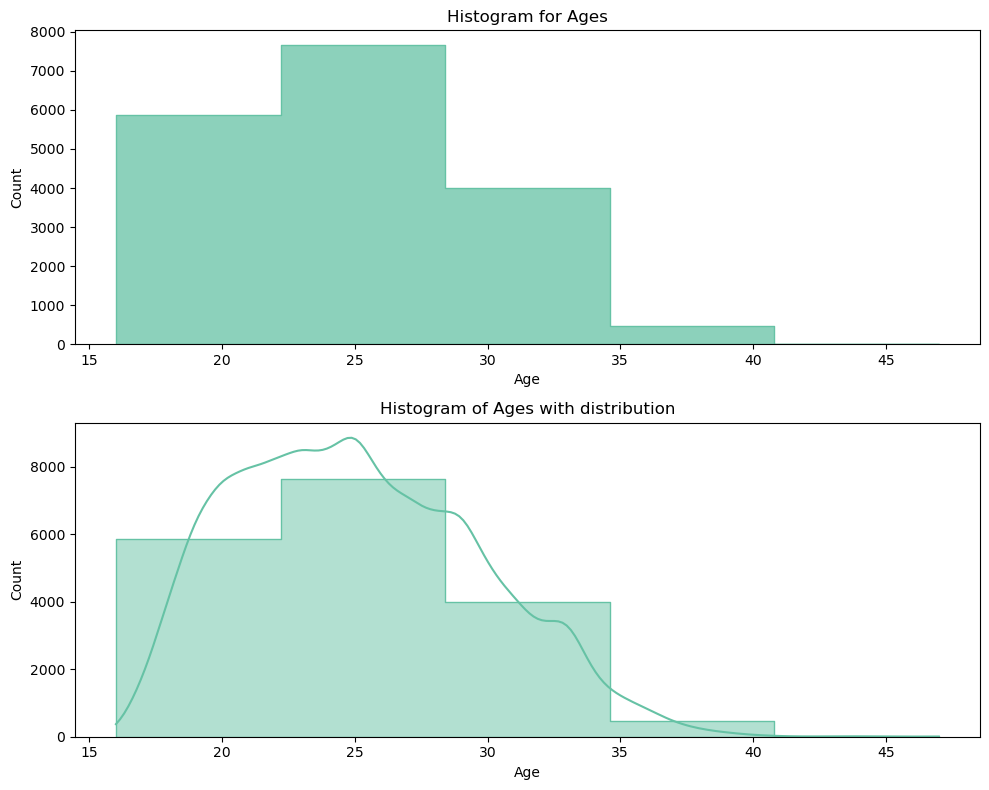

In [53]:
fig, ax = plt.subplots(2,1, figsize=(10,8))

sns.histplot(soccer['Age'], bins=5, element="step", ax=ax[0])
sns.histplot(soccer['Age'], bins=5, element="step", kde=True, ax=ax[1])

ax[0].set_title('Histogram for Ages')
ax[1].set_title('Histogram of Ages with distribution')

plt.tight_layout()
plt.show()

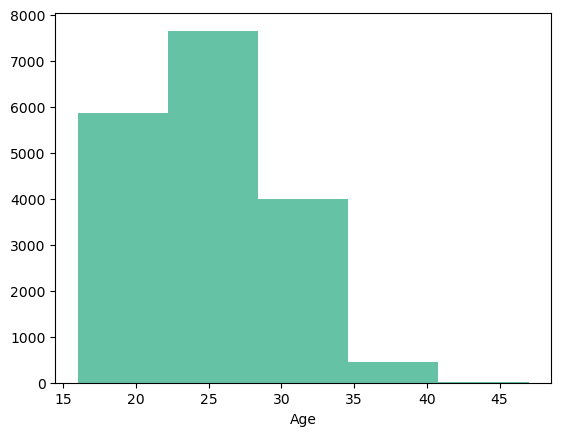

In [54]:
plt.xlabel('Age')
plt.hist(soccer['Age'], bins=5)
plt.show()

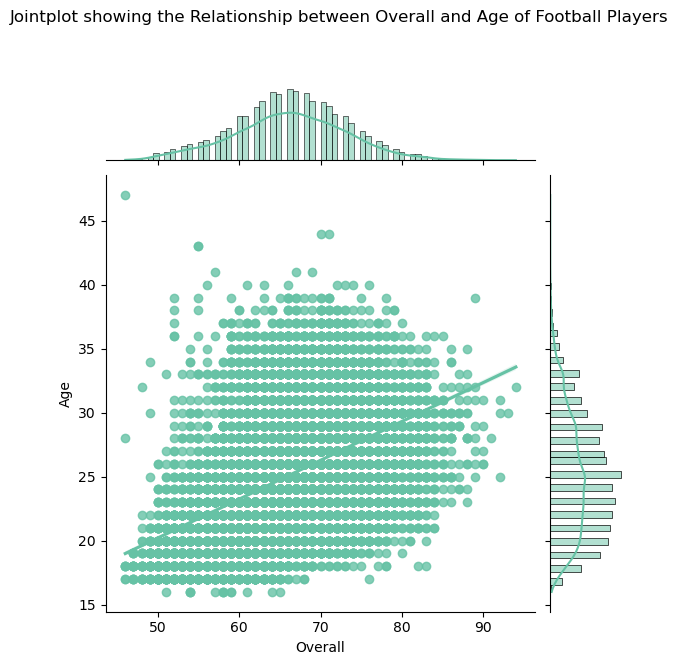

In [55]:
j = sns.jointplot(data=soccer, x='Overall', y='Age', kind='reg')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

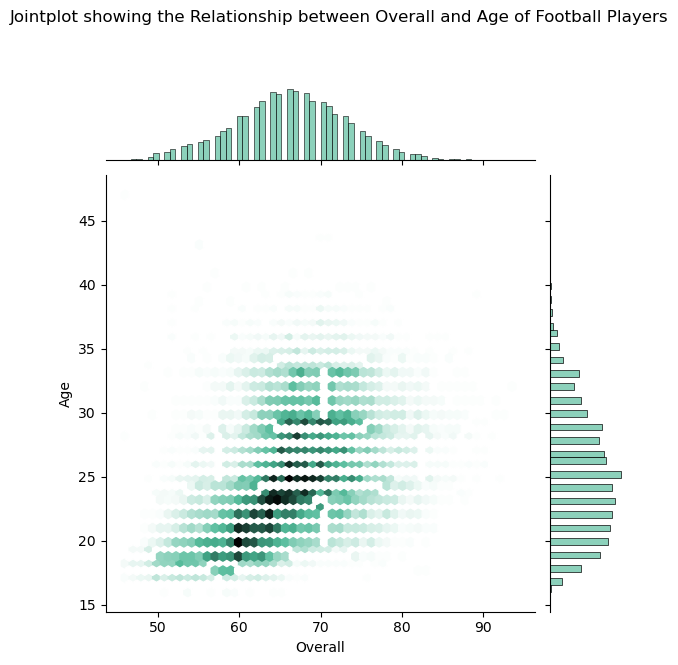

In [56]:
j = sns.jointplot(data=soccer, x='Overall', y='Age', kind='hex')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

In [57]:
young_players = soccer[(soccer['Age'] > 22) & (soccer['Age'] < 27)]

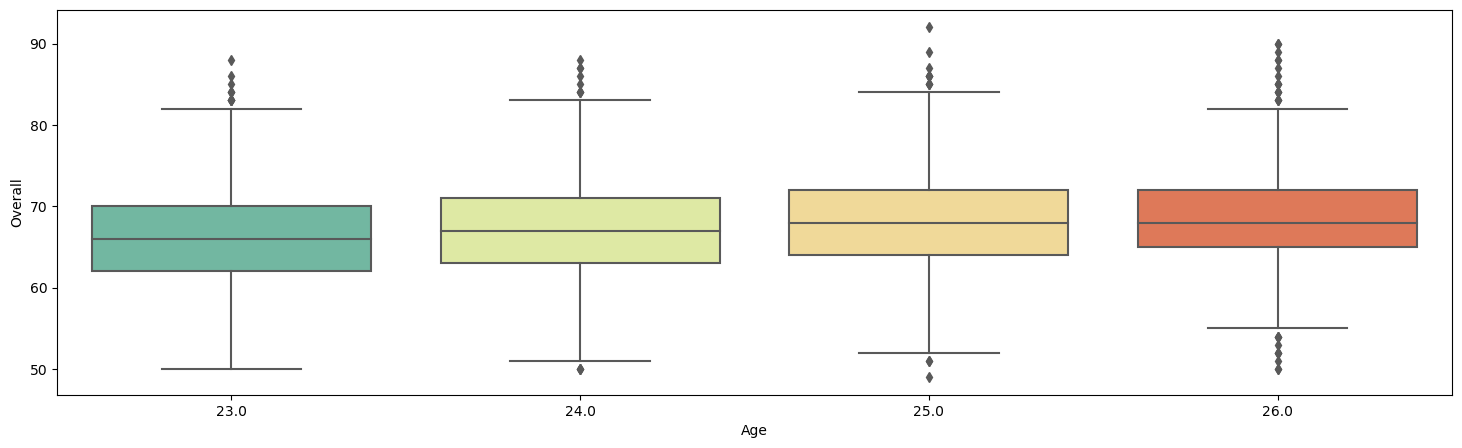

In [58]:
plt.figure(figsize=(18,5))

sns.boxplot(data=young_players, x='Age', y='Overall')
plt.show()

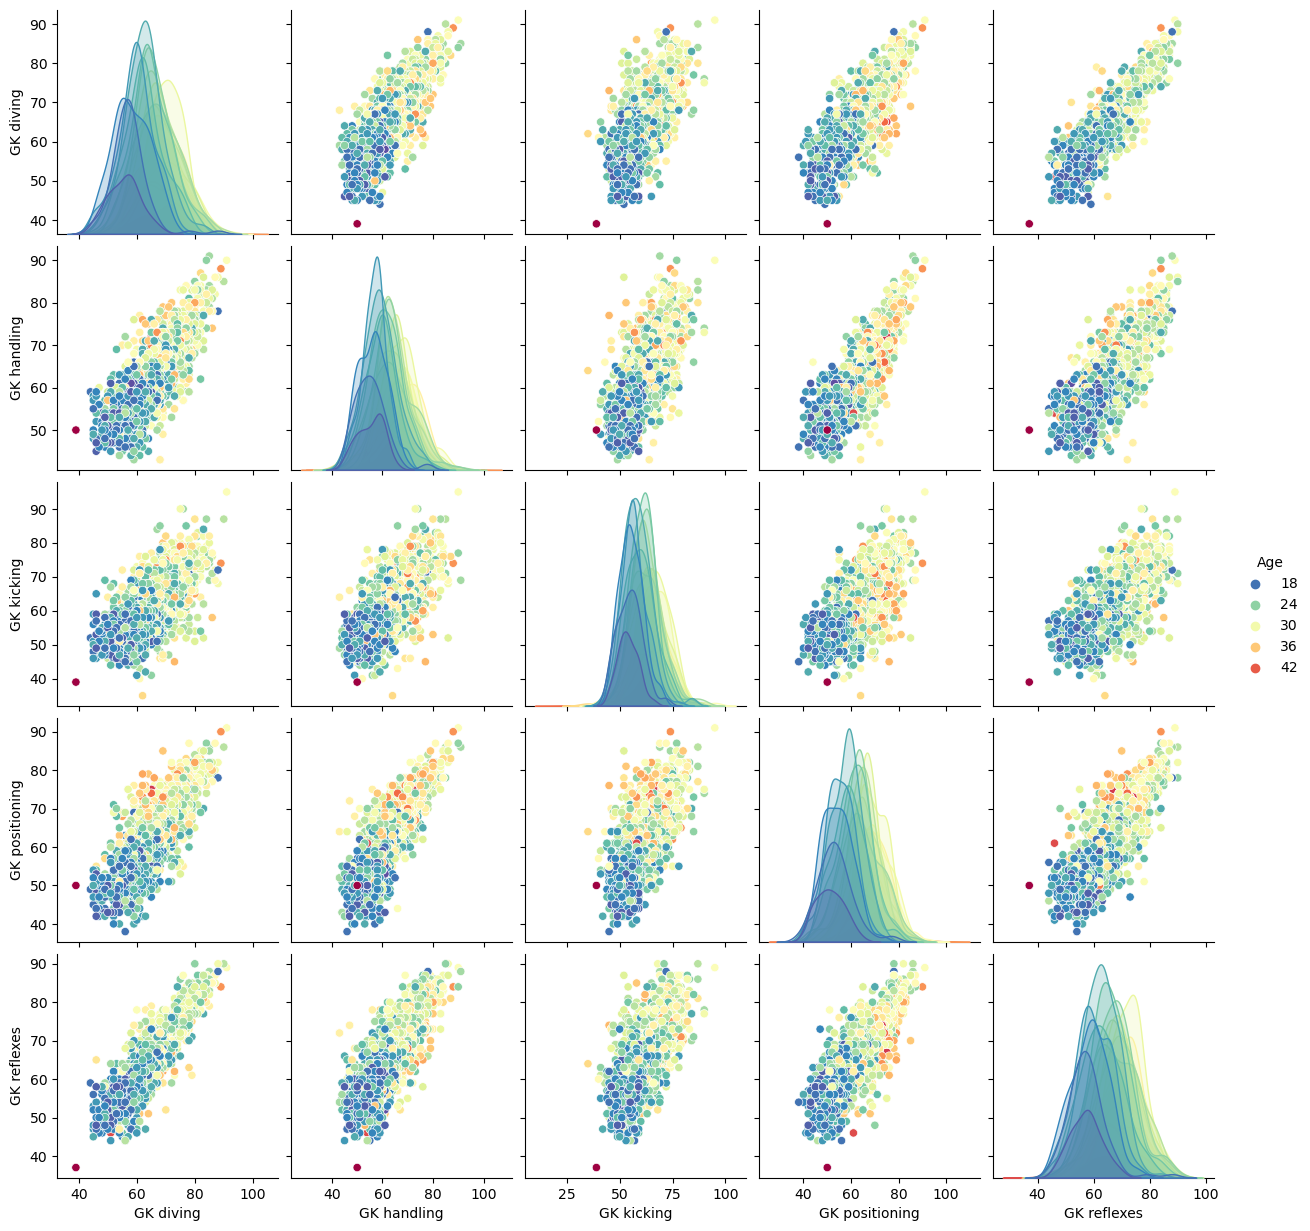

In [59]:
goalkeepers = soccer[(soccer['Preferred_Positions'].str.contains('GK'))]
sns.pairplot(goalkeepers[['Age','GK diving','GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']],
             hue='Age',palette="Spectral_r")
plt.show()

In [60]:
tips = sns.load_dataset("tips")


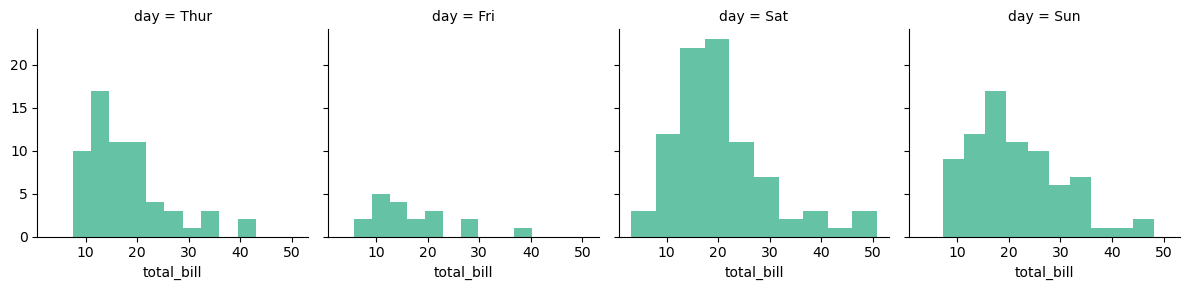

In [61]:
g = sns.FacetGrid(tips, col="day")
g.map(plt.hist, "total_bill");
plt.show()

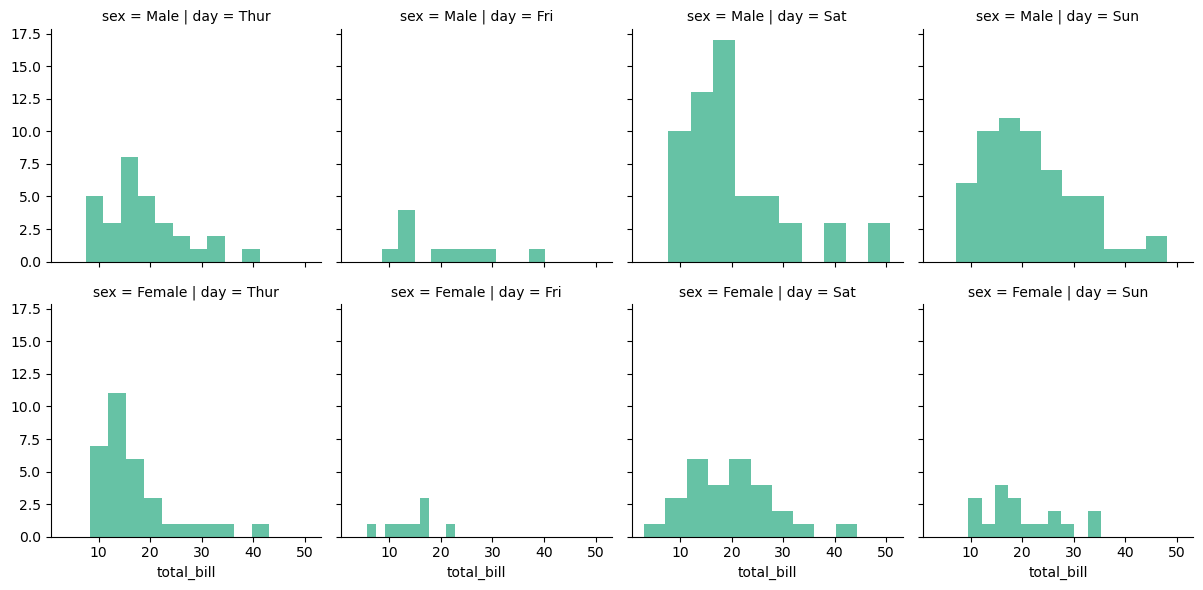

In [62]:
g = sns.FacetGrid(tips, col="day", row="sex")
g.map(plt.hist, "total_bill");
plt.show()

In [70]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install chart-studio


     -------------------------------------- 64.4/64.4 kB 694.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install pyarrow


Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install cufflinks


Note: you may need to restart the kernel to use updated packages.


In [77]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [79]:
import scipy
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [80]:
df = pd.read_parquet('https://github.com/WillKoehrsen/Data-Analysis/blob/master/medium/data/medium_data_2019_01_26?raw=true')
df.head()

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
129,2,597.301123,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00,42.17,7,70,2017-06-10 14:24:00,"[Climate Change, Economics]","Screw the Environment, but Consider Your Walle...","Screw the Environment, but Consider Your Wallet",8,published,166,1859,0.001076,0,0,0,0,0,0
125,18,589.983168,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00,30.34,14,54,2017-06-17 22:02:00,"[Climate Change, Humanity, Optimism, History]","The Vanquishing of War, Plague and Famine Part...","The Vanquishing of War, Plague and Famine",8,published,178,3891,0.004626,0,0,0,0,0,0
132,51,577.363292,20,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00,20.02,42,222,2017-06-30 12:00:00,"[Machine Learning, Python, Udacity, Kaggle]",Capstone Project: Mercedes-Benz Greener Manufa...,Capstone Project: Mercedes-Benz Greener Manufa...,7,published,1109,12025,0.004241,0,0,0,0,1,1
126,0,576.520688,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00,35.85,9,19,2017-06-30 18:21:00,"[Politics, Books, News, Media Criticism]",Home of the Scared A review of A Culture of Fe...,Home of the Scared,4,published,53,2533,0.000000,0,0,0,0,0,0
121,0,572.533035,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00,8.47,14,5,2017-07-03 20:18:00,"[Books, Psychology, History, Humanism]",The Triumph of Peace A review of The Better An...,The Triumph of Peace,4,published,59,3892,0.000000,1,0,0,0,0,0


In [81]:
df.describe()


,claps,days_since_publication,fans,num_responses,read_ratio,read_time,reads,title_word_count,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1815.263158,248.407273,352.052632,7.045113,29.074662,12.917293,6336.300752,7.127820,23404.030075,3029.120301,0.957638,20.330827,0.729323,0.609023,0.436090,0.383459,0.315789
std,2449.074661,179.370879,479.060117,9.056108,12.417670,9.510795,9007.284726,3.158475,33995.636496,2393.414456,1.846756,74.111579,0.445989,0.489814,0.497774,0.488067,0.466587
min,0.000000,1.218629,0.000000,0.000000,8.110000,1.000000,1.000000,2.000000,3.000000,163.000000,0.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,74.543822,23.000000,0.000000,20.020000,8.000000,363.000000,5.000000,1375.000000,1653.000000,0.052115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,815.000000,245.416130,136.000000,4.000000,27.060000,10.000000,2049.000000,7.000000,7608.000000,2456.000000,0.421525,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2700.000000,376.080598,528.000000,12.000000,34.910000,14.000000,7815.000000,8.000000,30141.000000,3553.000000,1.099366,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,13600.000000,597.301123,2588.000000,59.000000,74.370000,54.000000,41978.000000,16.000000,173714.000000,15063.000000,17.891817,349.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
from ipywidgets import interact, interact_manual, widgets


In [84]:
@interact
def show_titles_more_than(x=(10, 50000, 10),
                          column=['read_time', 'views', 'reads']):
    display(HTML(f'<h4>Showing articles with more than {x} {column}<h4>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

interactive(children=(IntSlider(value=25000, description='x', max=50000, min=10, step=10), Dropdown(descriptio…

In [85]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns),
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('claps', 'days_since_publication', 'fans', 'num…

In [86]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns),
                 y=list(df.select_dtypes('number').columns)[1:]):
    if x == y:
        print(f"Please select separate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers',
                 xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

In [91]:
pip install --upgrade pandas



     ---------------------------------------- 11.6/11.6 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 345.4/345.4 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [ ]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

# We use the Figure Factory module of Plotly, which
# defines many unique and powerful plots to be used
# in Python. 
# For more info, see: https://plot.ly/python/figure-factory-subplots/
import plotly.figure_factory as ff

corrs = df.corr(numeric_only=True)

@interact
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values,
                                     x =list(corrs.columns),
                                     y=list(corrs.index),
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)


In [93]:
  @interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns),
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()),
                 colorscale=list(cf.colors._scales_names.keys())):

    if x == y:
        print(f"Please select separate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers',
                 xTitle=x.title(), yTitle=y.title(),
                 text='title',
                 title=f'{y.title()} vs {x.title()}',
                theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

In [94]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install numpy==1.18.5


     ---------------------------------------- 5.4/5.4 MB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [90 lines of output]
  Running from numpy source directory.
  <string>:461: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\omare\AppData\Local\Temp\pip-install-ho_5xgle\numpy_05d783cd3d2640ba81d249e515602ec7\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\omare\AppData\Local\Temp\pip-install-ho_5xgle\numpy_05d783cd3d2640ba81d249e515602ec7\tools\cythonize.py:77: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  performance hint: _common.pyx:261:19: Exception check after calling 'random_func' will always require the GIL to be acquired. Declare 'random_func' as 'noexce

In [97]:
pip install daal==2021.4.0


     ---------------------------------------- 69.0/69.0 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 298.3/298.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [98]:
pip install --upgrade pip setuptools


     ---------------------------------------- 2.1/2.1 MB 3.2 MB/s eta 0:00:00
  Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.1
    Uninstalling setuptools-63.4.1:
      Successfully uninstalled setuptools-63.4.1
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [99]:
soccer_df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)
soccer_df

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,85,81,...,95,96,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,77,89,...,93,95,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,75,81,...,90,88,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,77,86,...,92,93,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,15,14,...,12,85,55,25,11,61,44,10,83,70,11,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,24,16,38,26,12,23,14,13,...,6,40,19,19,10,32,28,11,50,26,6,GK
17977,B. Richardson,47,England,46,25,44,35,44,22,44,11,12,...,13,51,12,13,13,25,32,12,47,17,12,GK
17978,J. Young,17,Scotland,46,66,26,60,77,41,50,28,32,...,46,54,42,42,14,51,33,17,32,37,33,ST
17979,J. Lundstram,18,England,46,57,46,58,74,43,45,34,30,...,37,49,49,43,47,58,49,48,46,51,25,CM


In [100]:
cols = ['Age', 'Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

soccer_df[cols] = soccer_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:ylabel='Nationality'>

Text(0.5, 1.0, 'Average Overall Rating for Top 5 Nationalities')

Text(0.5, 0, 'Average Overall Rating')

Text(0, 0.5, 'Nationality')

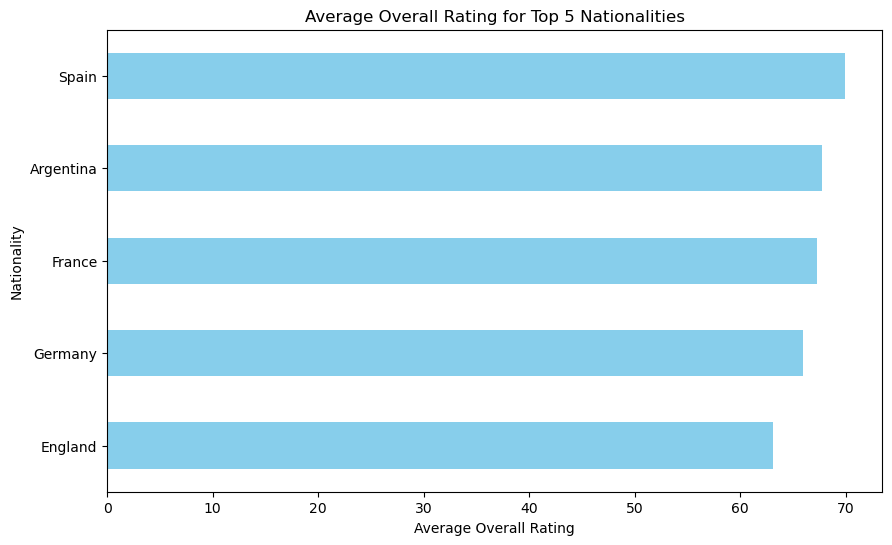

In [101]:
top_nationalities = soccer_df['Nationality'].value_counts().head(5).index

top_players_df = soccer_df[soccer_df['Nationality'].isin(top_nationalities)]
avg_ratings = top_players_df.groupby('Nationality')['Overall'].mean()
plt.figure(figsize=(10, 6))
avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Overall Rating for Top 5 Nationalities')
plt.xlabel('Average Overall Rating')
plt.ylabel('Nationality')
plt.show()


In [102]:
np.random.seed(0)


In [103]:
forest_areas = np.random.randint(500, 10000, size=1000)  
regions = ['Region' + str(i) for i in range(1, 1001)]

In [104]:
data = {'Region': regions, 'Forest_Area': forest_areas}
df = pd.DataFrame(data)


In [105]:
population_mean = df['Forest_Area'].mean()


In [106]:
population_variance = df['Forest_Area'].var(ddof=0)


In [108]:
print("Population Mean:", population_mean)


Population Mean: 5378.98


In [109]:
print("Population Variance:", population_variance)


Population Variance: 7517438.4416000135


In [110]:
sample = df.sample(30)
sample_mean = sample['Forest_Area'].mean()
sample_variance = sample['Forest_Area'].var(ddof=1)

print("Sample mean:", sample_mean)
print("Sample variance:", sample_variance)

print("\nComparison:")
print("Difference in means:", population_mean - sample_mean)
print("Difference in variances:", population_variance - sample_variance)


Sample mean: 5807.433333333333
Sample variance: 5368974.254022988

Comparison:
Difference in means: -428.45333333333383
Difference in variances: 2148464.187577026
